In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Using Data

In [2]:
F1 = np.array([1.0, 1.5, 1.8, 5, 2.0, 2.5, 3.0, 3.5, 4.0, 5.0, 6.0, 7.0, 8.0, 8.5, 9.0, 10.0])
T = np.array([3, 3.2, 3.6 , 8, 3.4, 4.5, 5, 5.8, 6, 6.5, 9, 9, 10, 12, 13, 15])
feature = np.array([F1]).T
target = T

### LinearRegression to Gradient Descent

In [3]:
class SimpleLinearRegression:

    def __init__(self, alpha=0.01, iterations=1000):
        self.alpha = alpha # learning rate
        self.iterations = iterations
        
        self.coef_ = None 
        self.intercept_ = None 
        self._mse = None # mean squared error

    
    def fit(self, X_data, y_data):
        # W, b initialize
        theta = np.zeros((X_data.shape[1] + 1)) # [b,W] y = 0X + 0
        self.coef_ = theta[1:]
        self.intercept_ = theta[0]

        bias_term = np.ones((X_data.shape[0], 1))
        X = np.concatenate((bias_term, X_data), axis=1)

        # Gradient Descent
        for i in range(self.iterations):
            pred = X @ theta
            error = pred - y_data
            self._mse = np.sum((error ** 2)) / len(X)

            theta -= self.alpha * (X.T @ error) / len(X)
            self.coef_ = theta[1:]
            self.intercept_ = theta[0]
            print(f'Epoch [{i + 1}/{self.iterations}] | MSE: {self._mse:.4f}')

    
    def predict(self, X_data):
        pred = X_data @ self.coef_ + self.intercept_ # hypothesis function
        return pred

    def score(self, X_data, y_data):
        pred = X_data @ self.coef_ + self.intercept_
        
        numerator = ((y_data - pred)**2).sum() # residual sum of squares, RSS
        denominator = ((y_data - y_data.mean())**2).sum() # total sum of squares, SST
        r_square = 1 - (numerator / denominator)
        return r_square



In [5]:
simple_linear_model = SimpleLinearRegression()
simple_linear_model.fit(feature, target)
theta = f'intercept(b): {simple_linear_model.intercept_} | coef(W): {simple_linear_model.coef_}'
score = f'score: {simple_linear_model.score(feature, target)}'
predict = f'predict: {simple_linear_model.predict([[1]])}'
print(theta)
print(score)
print(predict)

Epoch [1/1000] | MSE: 66.5563
Epoch [2/1000] | MSE: 30.7577
Epoch [3/1000] | MSE: 14.3946
Epoch [4/1000] | MSE: 6.9150
Epoch [5/1000] | MSE: 3.4957
Epoch [6/1000] | MSE: 1.9322
Epoch [7/1000] | MSE: 1.2169
Epoch [8/1000] | MSE: 0.8894
Epoch [9/1000] | MSE: 0.7391
Epoch [10/1000] | MSE: 0.6698
Epoch [11/1000] | MSE: 0.6375
Epoch [12/1000] | MSE: 0.6222
Epoch [13/1000] | MSE: 0.6146
Epoch [14/1000] | MSE: 0.6105
Epoch [15/1000] | MSE: 0.6080
Epoch [16/1000] | MSE: 0.6063
Epoch [17/1000] | MSE: 0.6050
Epoch [18/1000] | MSE: 0.6037
Epoch [19/1000] | MSE: 0.6026
Epoch [20/1000] | MSE: 0.6015
Epoch [21/1000] | MSE: 0.6004
Epoch [22/1000] | MSE: 0.5994
Epoch [23/1000] | MSE: 0.5983
Epoch [24/1000] | MSE: 0.5973
Epoch [25/1000] | MSE: 0.5963
Epoch [26/1000] | MSE: 0.5952
Epoch [27/1000] | MSE: 0.5942
Epoch [28/1000] | MSE: 0.5932
Epoch [29/1000] | MSE: 0.5921
Epoch [30/1000] | MSE: 0.5911
Epoch [31/1000] | MSE: 0.5901
Epoch [32/1000] | MSE: 0.5891
Epoch [33/1000] | MSE: 0.5881
Epoch [34/1000] 

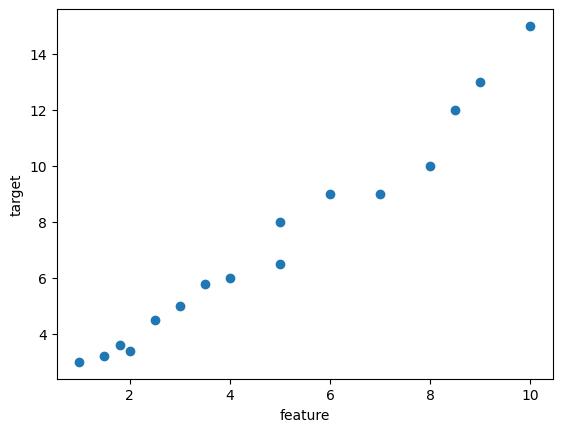

In [7]:
plt.scatter(feature, target)
plt.xlabel('feature')
plt.ylabel('target')
plt.show()

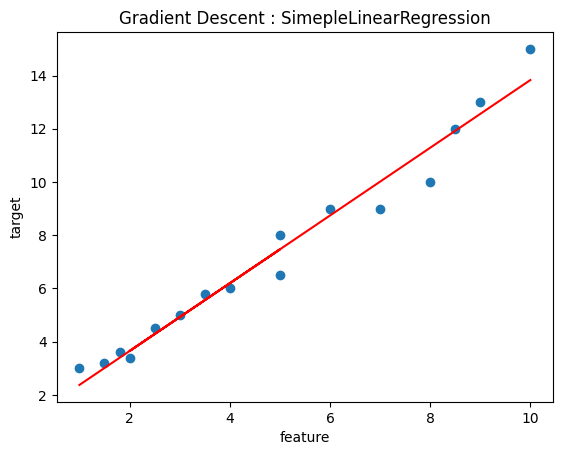

In [6]:
plt.scatter(feature, target)
plt.plot(feature, simple_linear_model.coef_ * feature + simple_linear_model.intercept_, color='red')
plt.title('Gradient Descent : SimepleLinearRegression')
plt.xlabel('feature')
plt.ylabel('target')
plt.show()

### LinearRegression to Normal Equation

In [6]:
class MyLinearRegression:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None


    def fit(self, X_data, y_data):
        bias_term = np.ones((X_data.shape[0], 1), dtype=float) 
        X = np.concatenate([bias_term, X_data], axis=1)
        
        theta = np.linalg.inv(X.T @ X) @ (X.T @ y_data) # normal_equation
        self.coef_ = theta[1:]
        self.intercept_ = theta[0]


    def predict(self, X_data): 
        pred = X_data @ self.coef_ + self.intercept_
        return pred


    def score(self, X_data, y_data):
        pred = X_data @ self.coef_ + self.intercept_

        numerator = ((y_data - pred)**2).sum()
        denominator = ((y_data - y_data.mean())**2).sum()
        r_square = 1 - (numerator / denominator)
        return r_square

In [7]:
my_linear_model = MyLinearRegression()
my_linear_model.fit(feature, target)
theta = f'intercept(b): {my_linear_model.intercept_} | coef(W): {my_linear_model.coef_}'
score = f'score: {my_linear_model.score(feature, target)}'
predict = f'predict: {my_linear_model.predict([[1]])}'
print(theta)
print(score)
print(predict)

intercept(b): 1.1851323888617535 | coef(W): [1.26012702]
score: 0.9704640929790224
predict: [2.4452594]


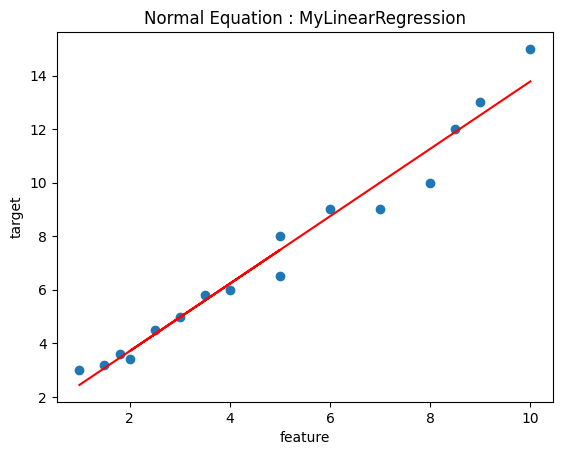

In [13]:
plt.scatter(feature, target)
plt.plot(feature, my_linear_model.coef_ * feature + my_linear_model.intercept_, color='red')
plt.title('Normal Equation : MyLinearRegression')
plt.xlabel('feature')
plt.ylabel('target')
plt.show()

### LinearRegression to scikit-learn

In [9]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(feature, target)
theta = f'intercept(b): {linear_model.intercept_} | coef(W): {linear_model.coef_}'
score = f'score: {linear_model.score(feature, target)}'
predict = f'predict: {linear_model.predict([[1]])}'
print(theta)
print(score)
print(predict)

intercept(b): 1.1851323888617475 | coef(W): [1.26012702]
score: 0.9704640929790224
predict: [2.4452594]


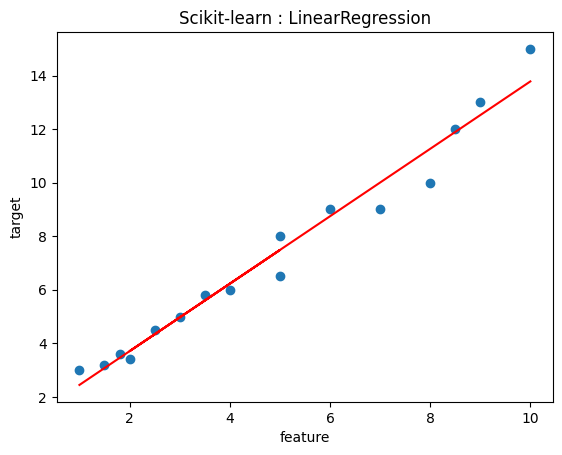

In [11]:
plt.scatter(feature, target)
plt.plot(feature, linear_model.coef_ * feature + linear_model.intercept_, color='red')
plt.title('Scikit-learn : LinearRegression')
plt.xlabel('feature')
plt.ylabel('target')
plt.show()